In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [27]:
df_gss_data = pd.read_csv('Data2/GSS2002.csv')
cols_loc = ['Education','DeathPenalty']
df_gss_data_contingency = df_gss_data.loc[:,cols_loc]
df_gss_data_contingency.head()
df_gss_data_contingency.dropna(subset= ['DeathPenalty','Education'],axis =0 , inplace = True)

In [28]:
pd.crosstab(df_gss_data_contingency.Education,df_gss_data_contingency.DeathPenalty,margins=True)

DeathPenalty,Favor,Oppose,All
Education,,,
Bachelors,135,71,206
Graduate,64,50,114
HS,511,200,711
Jr Col,71,16,87
Left HS,117,72,189
All,898,409,1307


# Permutation Test

In [80]:
orginal_chi_object = sm.stats.Table.from_data(df_gss_data_contingency)
orginal_chi_value = orginal_chi_object.chi2_contribs.to_numpy().sum()
df_temp = df_gss_data_contingency.copy()
list_chi_sq_values = []
for i in range(10**4 -2):
    df_temp['DeathPenalty'] = np.random.permutation(df_temp.DeathPenalty)
    temp_chi_object = sm.stats.Table.from_data(df_temp)
    list_chi_sq_values.append(temp_chi_object.chi2_contribs.to_numpy().sum())

In [81]:
np.sum(np.array(list_chi_sq_values) > orginal_chi_value)/10**4

0.0001

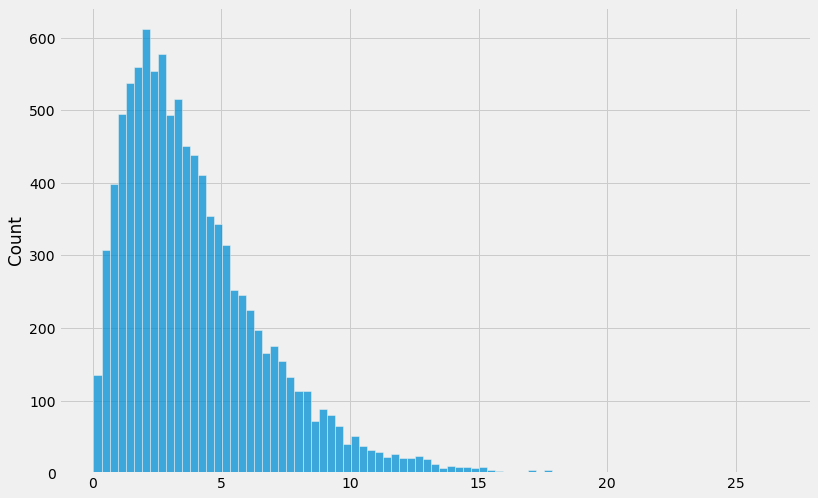

In [82]:
fig,axs = plt.subplots(1,1, figsize = (12,8))
sns.histplot(list_chi_sq_values,ax=axs)
plt.show()

In [90]:
-0.04/5.10

-0.00784313725490196